# Experiment 4: Non Linear Regression

In [1]:
import pickle

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
rcParams['agg.path.chunksize'] = 10000

from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

import seaborn as sns
from mpl_toolkits import mplot3d

from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("../../data/energy/df.csv", )
df.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
0,1054,32658,-16.064,-76.599,112.441,0.000,0.955,-0.296,35,28449.0,13.415,1,1
1,1054,32671,-16.208,-76.707,112.611,-0.719,0.415,0.558,24,28450.0,13.415,1,1
2,1053,32639,-16.064,-76.624,122.011,0.000,0.830,0.558,12,28450.0,13.415,1,1
3,1054,32670,-16.064,-76.624,112.611,0.000,0.830,0.558,54,28450.0,13.415,1,1
4,1054,32664,-15.968,-76.625,112.559,0.478,0.827,0.296,47,28451.0,13.415,1,1


In [3]:
df.describe()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
count,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,489906.000000,4.899060e+05,489906.000000,489906.0,489906.000000
mean,1048.735653,32496.026419,0.341670,-1.514543,119.205209,0.000912,-0.002101,-0.182805,26.056821,4.893892e+07,37.133466,1.0,3262.098839
std,592.666757,18372.661240,50.964521,62.401296,47.553276,0.582604,0.583274,0.535609,9.273521,2.905600e+07,24.312587,0.0,1937.060856
min,1.000000,1.000000,-94.627000,-115.600000,37.700000,-0.955000,-0.955000,-1.000000,1.000000,2.844900e+04,10.002000,1.0,1.000000
25%,537.000000,16622.000000,-44.772000,-58.113000,74.211000,-0.478000,-0.478000,-0.556000,23.000000,2.393785e+07,16.872000,1.0,1595.000000
50%,1056.000000,32727.000000,1.424000,-4.581000,121.789000,0.000000,-0.000000,-0.296000,26.000000,4.810140e+07,29.505000,1.0,3206.000000
75%,1562.000000,48398.750000,40.478000,48.480000,160.241000,0.478000,0.478000,0.296000,28.000000,7.434630e+07,52.643000,1.0,4956.000000
max,2070.000000,64170.000000,96.243000,105.024000,196.611000,0.955000,0.955000,0.558000,209.000000,9.998601e+07,99.947000,1.0,6665.000000


# HoldOut Set

In [4]:
np.random.seed(20)
remove_n = 10
group_names = df.group.unique()

drop_groups = np.random.choice(group_names, remove_n, replace=False)
hold_df = df[df.group.isin(drop_groups)]

df = df.drop(drop_groups)

# Define target and predictors

In [81]:
y = df['energy']

X = df[['pos_x', 'pos_y', 'pos_z', 'time']]

# Train/Test Split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=40)

print(" X TRAIN SHAPE: {} \n X TEST SHAPE: {} \n".format(X_train.shape, X_test.shape))
print(" Y TRAIN SHAPE: {} \n Y TEST SHAPE: {}".format(y_train.shape, y_test.shape))

 X TRAIN SHAPE: (323331, 4) 
 X TEST SHAPE: (166565, 4) 

 Y TRAIN SHAPE: (323331,) 
 Y TEST SHAPE: (166565,)


# Plots

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
train['bins'] = pd.cut(train['energy'], bins=10)

In [ ]:
sns.scatterplot("pos_y",
              "pos_x",
              hue="bins",
              data=train)

rcParams['figure.figsize'] = 17, 17

plt.savefig("../../assets/energy/energy_train", dpi=600, bbox_inches = "tight")

In [ ]:
test = pd.concat([X_test, y_test], axis=1)
test['bins'] = pd.cut(test['energy'], bins=10)

sns.scatterplot("pos_y",
                "pos_x",
                "bins",
                data=test)

rcParams['figure.figsize'] = 17,17
plt.savefig("../../assets/energy/energy_test", dpi=600, bbox_inches = "tight")

In [ ]:
# energy vs group

In [ ]:
e_groups = df.groupby('group')['energy'].nunique().to_frame().reset_index()
sns.scatterplot(x='group', y='energy', 
            data=e_groups)

plt.savefig("../../assets/energy/energy_groups", dpi=600, bbox_inches = "tight")

# Model 1: Decision Tree

In [58]:
dtree = DecisionTreeRegressor(max_depth=20,
                              min_samples_leaf=1,
                              random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=3)

## Model 1: Results

In [59]:
pred_train_tree = dtree.predict(X_train)
print("MSE: ", mean_squared_error(y_train, pred_train_tree))
print("R2: ", r2_score(y_train, pred_train_tree))

pred_test_tree = dtree.predict(X_test)
print("MSE: %.2f" % mean_squared_error(y_test, pred_test_tree))
print("R2: ", r2_score(y_test, pred_test_tree))

MSE:  110.34257598897051
R2:  0.8134264153272519
MSE: 125.41
R2:  0.7876113394906227


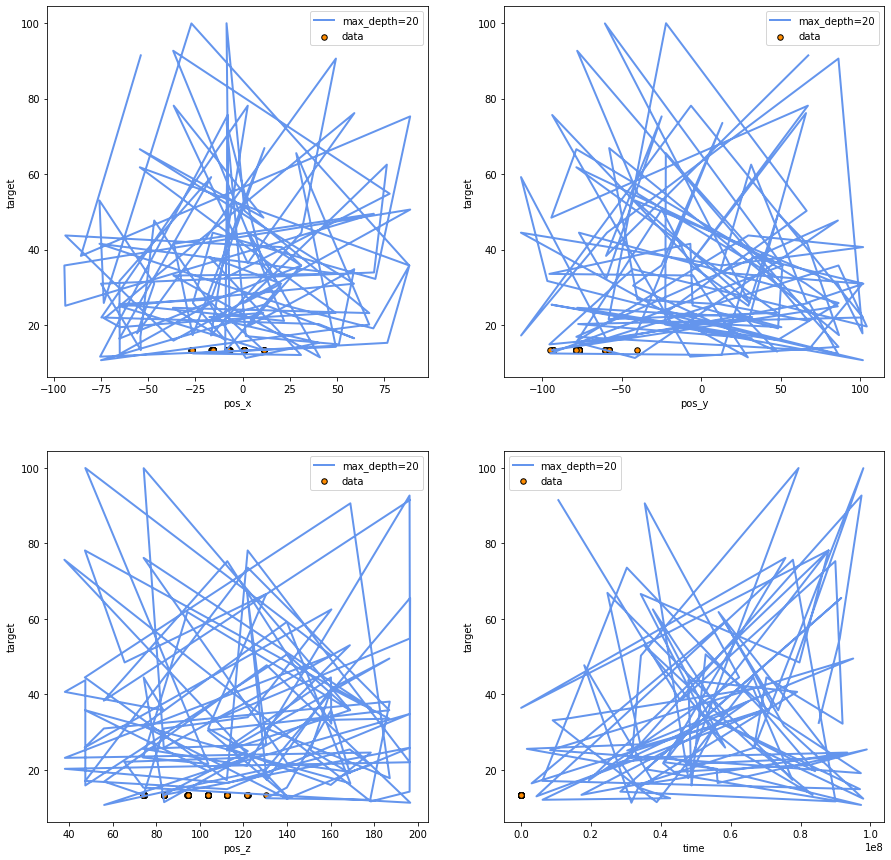

In [60]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

ax1.scatter(X.pos_x[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax1.plot(X_test.pos_x[:100], pred_test_tree[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax1.set_xlabel("pos_x")
ax1.set_ylabel("target")
ax1.legend()


ax2.scatter(X.pos_y[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax2.plot(X_test.pos_y[:100], pred_test_tree[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax2.set_xlabel("pos_y")
ax2.set_ylabel("target")
ax2.legend()


ax3.scatter(X.pos_z[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax3.plot(X_test.pos_z[:100], pred_test_tree[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax3.set_xlabel("pos_z")
ax3.set_ylabel("target")
ax3.legend()


ax4.scatter(X.time[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax4.plot(X_test.time[:100], pred_test_tree[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax4.set_xlabel("time")
ax4.set_ylabel("target")
ax4.legend()

plt.savefig("../../assets/energy/decision_tree.jpg", dpi=600, bbox_inches = "tight")

## Save Model

In [61]:
filename = 'dtree_model.sav'
pickle.dump(dtree, open(filename, 'wb'))

## Test on Unseen Data

In [62]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7876113394906227


In [68]:
Xnew = hold_df[['pos_x',
               'pos_y',
               'pos_z',
                'group',
               'time']]
hold_y = hold_df['energy']

ynew = loaded_model.predict(Xnew)

In [69]:
ynew

array([19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 85.136, 19.943, 19.943,
       85.136, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943,
       19.943, 19.943, 19.943, 19.943, 19.943, 19.943, 19.943])

In [70]:
hold_y

4437    14.66
4438    14.66
4439    14.66
4440    14.66
4441    14.66
        ...  
4527    14.66
4528    14.66
4529    14.66
4530    14.66
4531    14.66
Name: energy, Length: 95, dtype: float64

In [71]:
print("MSE: ", mean_squared_error(hold_y, ynew))
print("R2: ", r2_score(hold_y, ynew))

MSE:  131.8881203052631
R2:  -4.644112635220547e+30


# Model2: Random Forest (Bootstrap Aggregation)

In [72]:
model_rf = RandomForestRegressor(n_estimators=30,
                                 oob_score=True,
                                 random_state=100,
                                 verbose=2)

model_rf.fit(X_train, y_train) 

pred_train_rf = model_rf.predict(X_train)

print("MSE: ", mean_squared_error(y_train,pred_train_rf))
print("R2: ", r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print("MSE: ", mean_squared_error(y_test,pred_test_rf))
print("R2: ", r2_score(y_test, pred_test_rf))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 30


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   58.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


MSE:  2.5143429874054526
R2:  0.9957486040175108
MSE:  16.058303405727997
R2:  0.9728053631762343


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished


## Model2: Results

In [73]:
model_rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished


0.9728053631762343

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

ax1.scatter(X.pos_x[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax1.plot(X_test.pos_x[:100], pred_test_rf[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax1.set_xlabel("pos_x")
ax1.set_ylabel("target")
ax1.legend()


ax2.scatter(X.pos_y[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax2.plot(X_test.pos_y[:100], pred_test_rf[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax2.set_xlabel("pos_y")
ax2.set_ylabel("target")
ax2.legend()


ax3.scatter(X.pos_z[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax3.plot(X_test.pos_z[:100], pred_test_rf[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax3.set_xlabel("pos_z")
ax3.set_ylabel("target")
ax3.legend()


ax4.scatter(X.time[:100], y[:100], s=30, edgecolor="black",
            c="darkorange", label="data")
ax4.plot(X_test.time[:100], pred_test_rf[:100], color="cornflowerblue",
         label="max_depth=20", linewidth=2)
ax4.set_xlabel("time")
ax4.set_ylabel("target")
ax4.legend()

plt.savefig("../../assets/energy/random_forest.jpg", dpi=600, bbox_inches = "tight")

## Save Model

In [74]:
filename = 'rf_model.sav'
pickle.dump(model_rf, open(filename, 'wb'))

## Unseen Data

In [75]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9728053631762343


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished


In [51]:
hold_df = hold_df[hold_df.group==51]

In [77]:
Xnew = hold_df[['pos_x',
               'pos_y',
               'pos_z',
                'group',
               'time']]
hold_y = hold_df['energy']

ynew = loaded_model.predict(Xnew)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [78]:
np.unique(ynew)

array([56.19753333, 56.89943333, 56.91243333, 56.92266667, 57.01303333,
       57.02603333, 57.18323333, 57.19026667, 57.19623333, 57.29683333,
       57.30853333, 57.30983333, 57.39023333, 57.40486667, 57.4151    ,
       57.42213333, 57.4282    , 57.50383333, 58.18016667, 58.1904    ,
       58.35533333])

In [79]:
np.unique(hold_y)

array([14.66])

In [80]:
print('Mean squared error: %.2f'
      % mean_squared_error(hold_y, ynew))

print('Coefficient of determination: %.2f'
      % r2_score(hold_y, ynew))

Mean squared error: 1812.38
Coefficient of determination: -63818506393735510684102773702656.00
